# Análise Prospocção de leads - Economapas

# 0.0 Importação bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from functools import reduce

# 0.1 Coleta da Base de dados

In [4]:
# Nome do arquivo Excel
nome_arquivo = "Desafio Economapas - Estagiário de Dados 2024 - PLANILHA TESTE.xlsx"

# Lista de nomes das planilhas
nomes_planilhas = ["BASE", "ORIGEM", "MERCADO", "LOCAL", "PORTE", "OBJETIVO"]

# Importando todas as planilhas em um dicionário de DataFrames
dict_df = pd.read_excel(nome_arquivo, sheet_name=nomes_planilhas)

# Agora, se desejar acessar cada DataFrame individualmente, pode fazer assim:
df_base = dict_df["BASE"]
df_origem = dict_df["ORIGEM"]
df_mercado = dict_df["MERCADO"]
df_local = dict_df["LOCAL"]
df_porte = dict_df["PORTE"]
df_objetivo = dict_df["OBJETIVO"]


### 0.1.1 Ajustando Base de dados

In [5]:
# Lista de DataFrames que você tem
dataframes = [df_origem, df_mercado, df_local, df_porte, df_objetivo, df_base]

# Mesclar os DataFrames sequencialmente usando a função reduce
df1 = reduce(lambda left, right: pd.merge(left, right, on='LEAD_ID', how='left'), dataframes)
df1 = df1.drop("MERCADO_y", axis=1)
df1 = df1.rename(columns={'MERCADO_x': 'MERCADO'})

#Retirando dados duplicados
df1 = df1.drop_duplicates()

df1.head()


,LEAD_ID,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO,DATA CADASTRO,VENDIDO
0,11316042,Orgânico,NaN,Varejo,Belém - PA,1-10,Abertura/Expansão,2021-02-10 16:23:30,NÃO
1,11374979,Orgânico,NaN,Varejo,"São Paulo, SP",11-50,NaN,2021-02-17 11:10:28,NÃO
2,11997870,Prospecção Ativa,Sales Navigator,Varejo,-,NaN,NaN,2021-04-15 11:06:00,NÃO
3,11930537,Prospecção Ativa,Sales Navigator,Varejo,-,NaN,NaN,2021-04-09 13:10:21,NÃO
4,11899381,Prospecção Ativa,Sales Navigator,Varejo,-,NaN,NaN,2021-04-07 13:13:49,NÃO


In [6]:
# Criação de colunas temporal
df1['month'] = df1['DATA CADASTRO'].dt.month
df1['month'] = df1['month'].astype(int)
df1['year'] = df1['DATA CADASTRO'].dt.year
df1['year'] = df1['year'].astype(int)

# Criação de coluna de ESTADO
# Substituir vírgulas por hifens na coluna 'LOCAL'
df1['LOCAL'] = df1['LOCAL'].str.replace(',', ' -')
df1['ESTADO'] = df1['LOCAL'].apply(lambda x: x.split(' - ')[-1])
df1['ESTADO'] = df1['ESTADO'].str.replace('São Paulo', 'SP')
df1['ESTADO'] = df1['ESTADO'].str.replace('Rio de Janeiro', 'RJ')
df1['ESTADO'] = df1['ESTADO'].str.replace('Minas Gerais', 'MG')
df1['ESTADO'] = df1['ESTADO'].str.replace('-', 'nao_informado')

#Criando Df somente que foram vendidos
df_vendido = df1[df1['VENDIDO'] == 'SIM']

In [7]:
df1.shape

(2271, 12)

# 0.2 Funções de apoio

In [8]:
def grafico_barra(df, coluna, titulo):
    # Contagem dos valores da coluna especificada
    contagem_valores = df[coluna].value_counts()

    # Criando o gráfico de barras
    plt.bar(contagem_valores.index.astype(str), contagem_valores.values, color=cor_padrao)

    # Adicionando os valores das barras
    for i, value in enumerate(contagem_valores.values):
        plt.text(i, value, str(value), ha='center', va='bottom')

    # Adicionando título e rótulos dos eixos
    plt.title(titulo)
    plt.xlabel(coluna)
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45, ha='right')

    # Mostrando o gráfico
    plt.show()
    
    
def grafico_barra_top7(df, coluna):
    # Contagem dos valores da coluna especificada
    contagem_valores = df[coluna].value_counts().head(7)

    # Criando o gráfico de barras
    plt.bar(contagem_valores.index.astype(str), contagem_valores.values, color=cor_padrao)

    # Adicionando os valores das barras
    for i, value in enumerate(contagem_valores.values):
        plt.text(i, value, str(value), ha='center', va='bottom')

    # Adicionando título e rótulos dos eixos
    plt.title(f'Top 7 de Leads na Coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45, ha='right')

    # Mostrando o gráfico
    plt.show()
    
def empilhar_dados(df, coluna_empilhada, coluna_base):
    # Criar uma tabela  entre as duas colunas
    tabela_contingencia = pd.crosstab(df[coluna_base], df[coluna_empilhada])

    # Plotar o gráfico de barras empilhadas
    ax = tabela_contingencia.plot(kind='bar', stacked=True)

    # Adicionar os valores das barras empilhadas
    for container in ax.containers:
        ax.bar_label(container, label_type='center')

    # Adicionar título e rótulos dos eixos
    plt.title(f'Empilhamento dos dados de {coluna_empilhada} sobre {coluna_base}')
    plt.xlabel(coluna_base)
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45, ha='right')

    # Mostrar o gráfico
    plt.show()
    
    
def empilhar_dados_top7(df, coluna_empilhada, coluna_base):
    # Calcular os 7 maiores valores da coluna base
    maiores_valores = df[coluna_base].value_counts().head(7).index

    # Filtrar o DataFrame para incluir apenas os 7 maiores valores da coluna base
    df_filtrado = df[df[coluna_base].isin(maiores_valores)]

    # Criar uma tabela de contingência entre as duas colunas
    tabela_contingencia = pd.crosstab(df_filtrado[coluna_base], df_filtrado[coluna_empilhada])

    # Plotar o gráfico de barras empilhadas
    ax = tabela_contingencia.plot(kind='bar', stacked=True)

    # Adicionar os valores das barras empilhadas
    for container in ax.containers:
        ax.bar_label(container, label_type='center')

    # Adicionar título e rótulos dos eixos
    plt.title(f'Empilhamento dos dados de {coluna_empilhada} sobre {coluna_base}')
    plt.xlabel(coluna_base)
    plt.ylabel('Quantidade')

    # Mostrar o gráfico
    plt.show()
    
# Definindo uma cor padrão para os gráficos
cor_padrao = '#1f77b4'


def plot_stacked_bar(df, origem_col, vendido_col):
    """
    Plota um gráfico de barras empilhadas mostrando a distribuição de vendas por origem.

    Parâmetros:
        - df: DataFrame contendo os dados.
        - origem_col: Nome da coluna que contém as origens.
        - vendido_col: Nome da coluna que contém a informação de vendido ('Sim'/'Não').
    """

    # Agrupar os dados da coluna 'VENDIDO' por origem e contar o número de 'Sim' e 'Não' para cada origem
    vendas_por_origem = df.groupby([origem_col, vendido_col]).size().unstack(fill_value=0)

    # Criar o gráfico de barras empilhadas
    plt.figure(figsize=(14, 6))
    vendas_por_origem.plot(kind='bar', stacked=True)
    plt.title(f'Distribuição de Vendas por {origem_col}')
    plt.xlabel('Origem')
    plt.ylabel('Número de Leads')
    plt.xticks(rotation=75)
    plt.legend(title='Vendido', labels=['Não', 'Sim'])
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


# 1.0 Análise inicial das tabelas

## 1.1 df_base e df_mercado

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2271 entries, 0 to 2332
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LEAD_ID        2271 non-null   int64         
 1   ORIGEM         2271 non-null   object        
 2   SUB-ORIGEM     1464 non-null   object        
 3   MERCADO        2176 non-null   object        
 4   LOCAL          2271 non-null   object        
 5   PORTE          2076 non-null   object        
 6   OBJETIVO       2058 non-null   object        
 7   DATA CADASTRO  2271 non-null   datetime64[ns]
 8   VENDIDO        2271 non-null   object        
 9   month          2271 non-null   int32         
 10  year           2271 non-null   int32         
 11  ESTADO         2271 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 212.9+ KB


- A base de dados tem informaçoes de 01/12/2020 até 18/04/2021

In [10]:
df1.describe()

,LEAD_ID,DATA CADASTRO,month,year
count,2.271000e+03,2271,2271.000000,2271.000000
mean,1.133339e+07,2021-02-13 12:50:30.980185088,4.062968,2020.829150
min,1.056589e+07,2020-12-01 00:09:34,1.000000,2020.000000
25%,1.093990e+07,2021-01-12 08:28:12,2.000000,2021.000000
50%,1.139044e+07,2021-02-18 14:54:24,3.000000,2021.000000
75%,1.164552e+07,2021-03-15 16:04:04.500000,4.000000,2021.000000
max,1.202567e+07,2021-04-18 23:05:38,12.000000,2021.000000
std,4.105540e+05,NaN,3.714479,0.376461


- A coluna só possui valores de SIM e NÃO

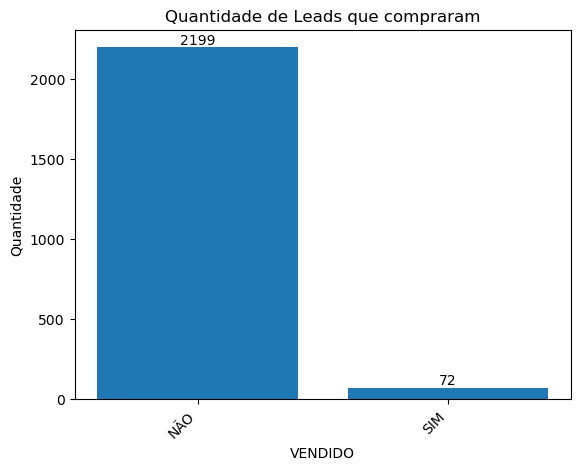

In [11]:
grafico_barra(df1, 'VENDIDO', 'Quantidade de Leads que compraram')

In [12]:
df1['MERCADO'].value_counts()

MERCADO
Servicos                                 566
Empreendedor                             488
Varejo                                   287
Franqueadora                             202
Imobiliaria/Incorporadora/Construtora    169
Marketing/Publicidade/Consultoria        166
Tecnologia                               149
Industria                                149
Name: count, dtype: int64

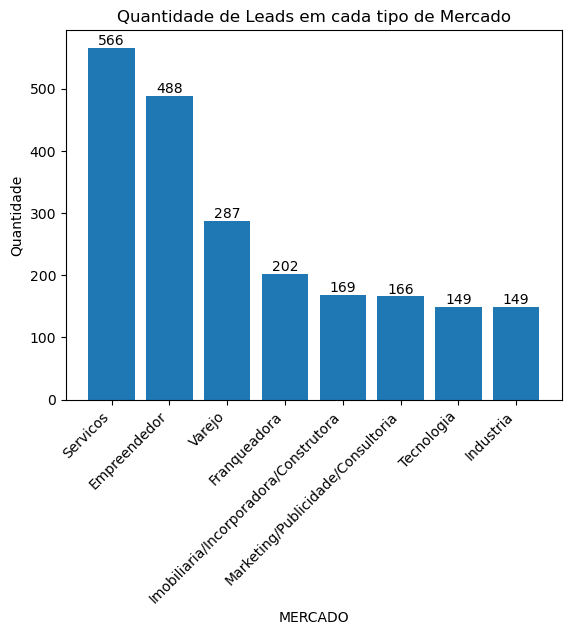

In [13]:
grafico_barra(df1, 'MERCADO', 'Quantidade de Leads em cada tipo de Mercado')

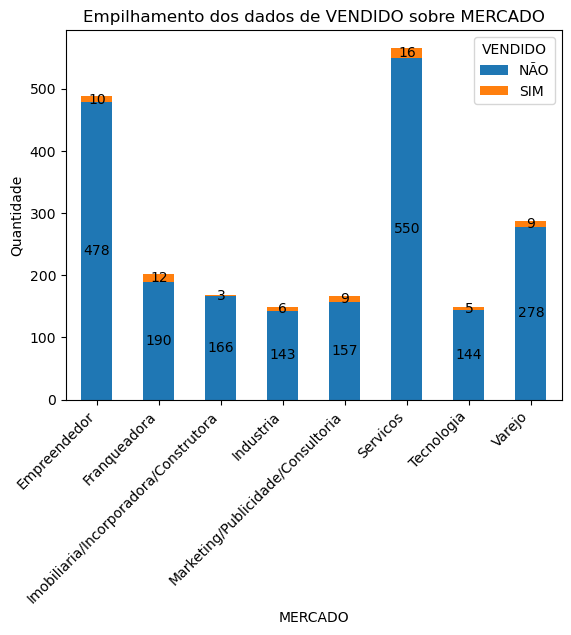

In [14]:
empilhar_dados(df1, 'VENDIDO', 'MERCADO')

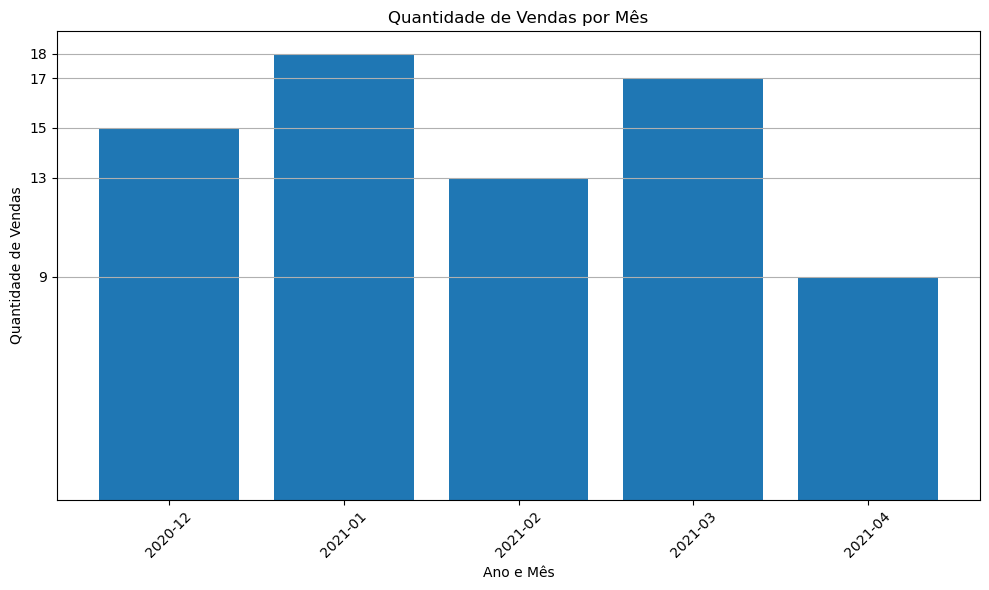

In [15]:
# Filtrando os dados para VENDIDO=Sim
df_vendido = df1[df1['VENDIDO'] == 'SIM']

# Agrupando os dados por ano e mês e contando as vendas
vendas_por_mes = df_vendido.groupby(['year', 'month']).size().reset_index(name='Quantidade')

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(vendas_por_mes.index, vendas_por_mes['Quantidade'], color=cor_padrao)
plt.title('Quantidade de Vendas por Mês')
plt.xlabel('Ano e Mês')
plt.ylabel('Quantidade de Vendas')
plt.xticks(ticks=vendas_por_mes.index, labels=[f"{year}-{month:02d}" for year, month in zip(vendas_por_mes['year'], vendas_por_mes['month'])], rotation=45)
plt.grid(True, axis='y')

# Definindo os valores no eixo y como os valores da coluna 'Quantidade'
plt.yticks(vendas_por_mes['Quantidade'])

plt.tight_layout()
plt.show()

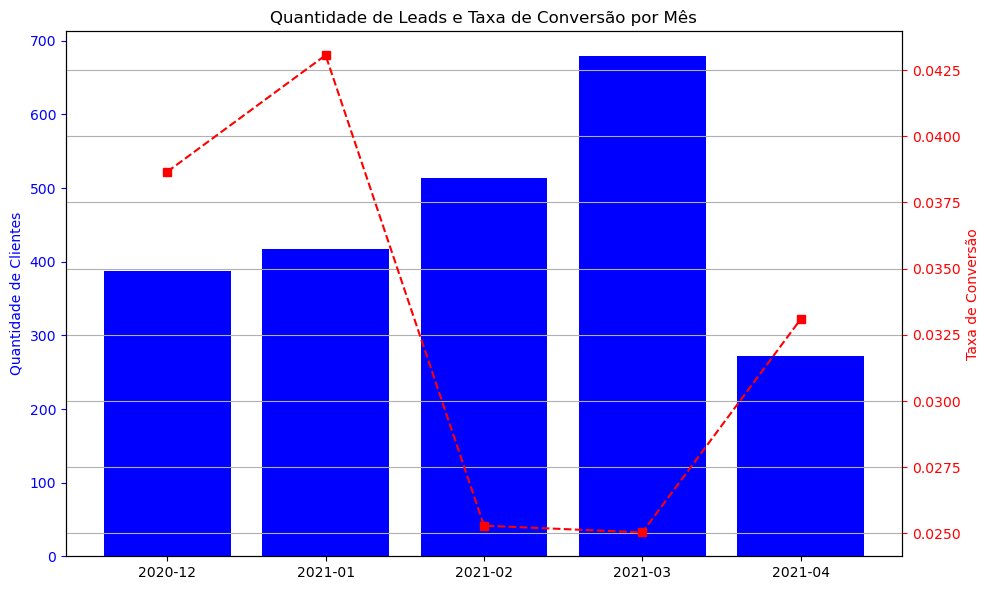

In [47]:
# Convertendo a coluna 'DATA CADASTRO' para o formato datetime
df1['DATA CADASTRO'] = pd.to_datetime(df1['DATA CADASTRO'])

# Filtrando os dados para VENDIDO=Sim
df_vendido = df1[df1['VENDIDO'] == 'SIM']

# Agrupando os dados por ano e mês e contando os clientes
clientes_por_mes = df1.groupby(['year', 'month']).size().reset_index(name='Clientes')

# Calculando a quantidade de vendas por mês
vendas_por_mes = df_vendido.groupby(['year', 'month']).size().reset_index(name='Vendas')

# Mesclando os DataFrames para calcular a taxa de conversão
df_merge = pd.merge(clientes_por_mes, vendas_por_mes, on=['year', 'month'], how='left')

# Calculando a taxa de conversão
df_merge['Taxa de Conversão'] = df_merge['Vendas'] / df_merge['Clientes']

# Criando o gráfico de barras e a linha de taxa de conversão
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotando a quantidade de clientes (barras)
ax1.bar(df_merge.index, df_merge['Clientes'], color='b', label='Clientes')
ax1.set_ylabel('Quantidade de Clientes', color='b')
ax1.tick_params('y', colors='b')

# Adicionando eixos secundários para a taxa de conversão (linha)
ax2 = ax1.twinx()
ax2.plot(df_merge.index, df_merge['Taxa de Conversão'], marker='s', linestyle='--', color='r', label='Taxa de Conversão')
ax2.set_ylabel('Taxa de Conversão', color='r')
ax2.tick_params('y', colors='r')

plt.title('Quantidade de Leads e Taxa de Conversão por Mês')
plt.xlabel('Ano e Mês')
plt.xticks(ticks=df_merge.index, labels=[f"{year}-{month:02d}" for year, month in zip(df_merge['year'], df_merge['month'])], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Insights
- Por mais que o numero de clientes aumentou em fevereiro e março de 2021, a taxa de conversão teve um valor muito abaixo.
- Isso pode ser explicado por um efeito de sazonalidade, em que as pessoas não compram muito nessa época do ano devido ao gasto no inicio do ano.

## 1.2 df_origem

In [17]:
df_origem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   LEAD_ID     2273 non-null   int64 
 1   ORIGEM      2273 non-null   object
 2   SUB-ORIGEM  1465 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.4+ KB


In [18]:
df_origem.describe()

,LEAD_ID
count,2.273000e+03
mean,1.133314e+07
std,4.104674e+05
min,1.056589e+07
25%,1.093991e+07
50%,1.139028e+07
75%,1.164550e+07
max,1.202567e+07


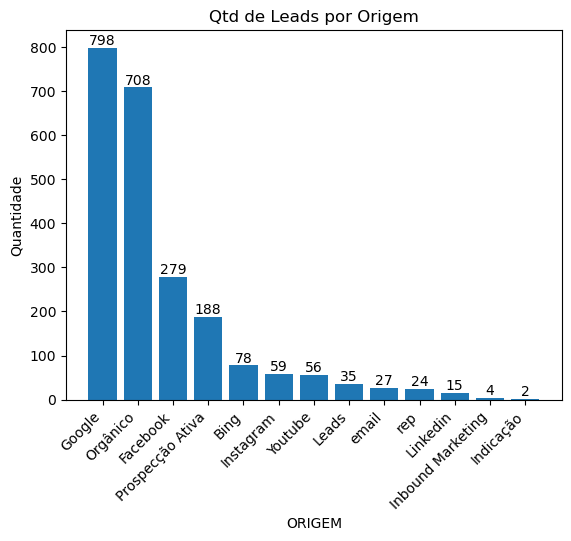

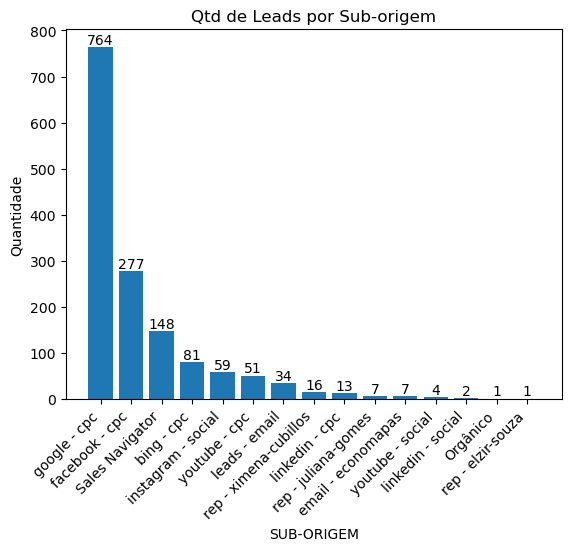

In [19]:
grafico_barra(df_origem,'ORIGEM', 'Qtd de Leads por Origem')
grafico_barra(df_origem, 'SUB-ORIGEM', 'Qtd de Leads por Sub-origem')

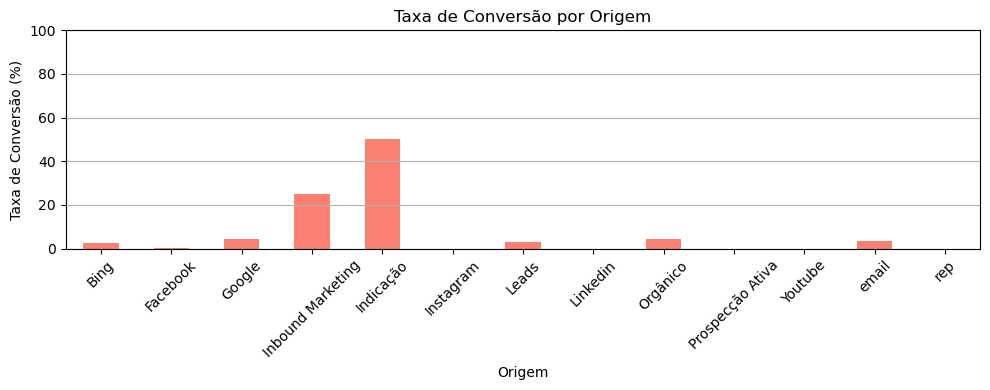

In [20]:
# Contagem de leads por origem e suborigem
contagem_origem = df1.groupby('ORIGEM').size()

# Filtrar os leads vendidos (convertidos)
leads_vendidos = df1[df1['VENDIDO'] == 'SIM']['LEAD_ID']

# Calcular a taxa de conversão por origem 
vendas_por_origem = df1[df1['LEAD_ID'].isin(leads_vendidos)].groupby('ORIGEM').size()

taxa_conversao_origem = (vendas_por_origem / contagem_origem) * 100

# Gráfico de Barras para Taxa de Conversão por Origem
plt.figure(figsize=(10, 4))
taxa_conversao_origem.plot(kind='bar', color='salmon')
plt.title('Taxa de Conversão por Origem')
plt.xlabel('Origem')
plt.ylabel('Taxa de Conversão (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [21]:
taxa_conversao_origem

ORIGEM
Bing                  2.564103
Facebook              0.358423
Google                4.391468
Inbound Marketing    25.000000
Indicação            50.000000
Instagram                  NaN
Leads                 2.857143
Linkedin                   NaN
Orgânico              4.243281
Prospecção Ativa           NaN
Youtube                    NaN
email                 3.703704
rep                        NaN
dtype: float64

##### Insights
- Em uma análise superficial, o canal do Google parece ser o que mais vale a pena, tendo uma porcentagem de conversão de 4% e alcançando o maior número de leads(764)
- Podemos reparar que a Origem que mais tem % de conversão é a indicação(50%), porém só tivam dois clientes. Então não quer dizer necessáriamente que essa origem funciona bem
- A coluna suborigem poderia ser muito relevante para a analise, porém possui muitos dados faltantes

## 1.3 df_local

In [22]:
df_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   LEAD_ID  2273 non-null   int64 
 1   LOCAL    2273 non-null   object
dtypes: int64(1), object(1)
memory usage: 35.6+ KB


In [23]:
df1.head()

,LEAD_ID,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO,DATA CADASTRO,VENDIDO,month,year,ESTADO
0,11316042,Orgânico,NaN,Varejo,Belém - PA,1-10,Abertura/Expansão,2021-02-10 16:23:30,NÃO,2,2021,PA
1,11374979,Orgânico,NaN,Varejo,São Paulo - SP,11-50,NaN,2021-02-17 11:10:28,NÃO,2,2021,SP
2,11997870,Prospecção Ativa,Sales Navigator,Varejo,-,NaN,NaN,2021-04-15 11:06:00,NÃO,4,2021,nao_informado
3,11930537,Prospecção Ativa,Sales Navigator,Varejo,-,NaN,NaN,2021-04-09 13:10:21,NÃO,4,2021,nao_informado
4,11899381,Prospecção Ativa,Sales Navigator,Varejo,-,NaN,NaN,2021-04-07 13:13:49,NÃO,4,2021,nao_informado


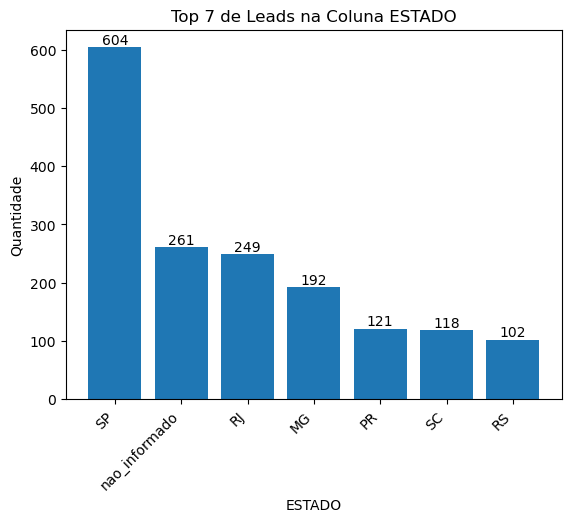

In [24]:
grafico_barra_top7(df1, 'ESTADO')

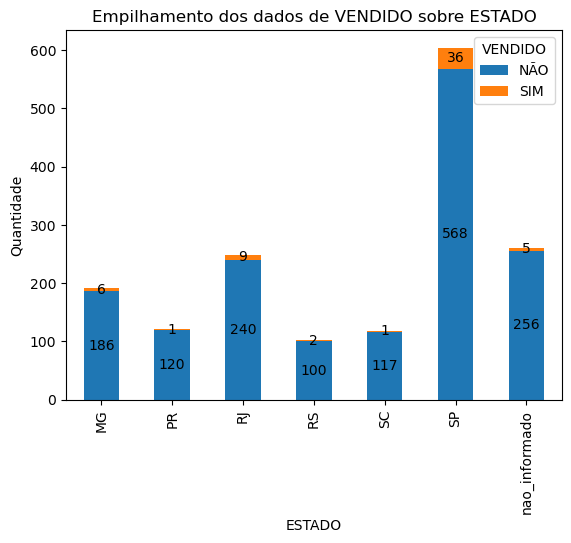

In [25]:
empilhar_dados_top7(df1, 'VENDIDO', 'ESTADO')

In [26]:
leads_por_estado = df1.groupby('ESTADO')['LEAD_ID'].count()
vendas_por_estado = df1[df1['LEAD_ID'].isin(df1[df1['VENDIDO'] == 'SIM']['LEAD_ID'])].groupby('ESTADO')['LEAD_ID'].count()

# 3. Cálculo da Taxa de Conversão por Estado
taxa_conversao_por_estado = ((vendas_por_estado / leads_por_estado) * 100).sort_values(ascending=False)

taxa_conversao_por_estado


ESTADO
PI                           6.250000
SP                           5.960265
DF                           4.411765
ES                           4.166667
PE                           3.703704
RJ                           3.614458
MA                           3.125000
MG                           3.125000
MT                           3.125000
CE                           2.857143
RS                           1.960784
nao_informado                1.915709
BA                           1.190476
SC                           0.847458
PR                           0.826446
AC                                NaN
AL                                NaN
AM                                NaN
AP                                NaN
Brasil                            NaN
GO                                NaN
Guarulhos nao_informadoSP         NaN
MS                                NaN
PA                                NaN
PB                                NaN
Pr                                NaN
RN   

##### Insights
- A região sudeste tem a maior concentração de Leads e de compradores, São Paulo tem a taxa de conversão de 5.9%
- Muitas cidades não foram informadas. Todas as linhas com ORIGEM = prospecção ativa estão com cidade nula.

## df_porte

In [27]:
df_porte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   LEAD_ID  2273 non-null   int64 
 1   PORTE    2078 non-null   object
dtypes: int64(1), object(1)
memory usage: 35.6+ KB


In [28]:
df_porte['PORTE'].value_counts()

PORTE
1-10        821
0           740
11-50       285
51-300      141
+ 1000       55
301-1000     36
Name: count, dtype: int64

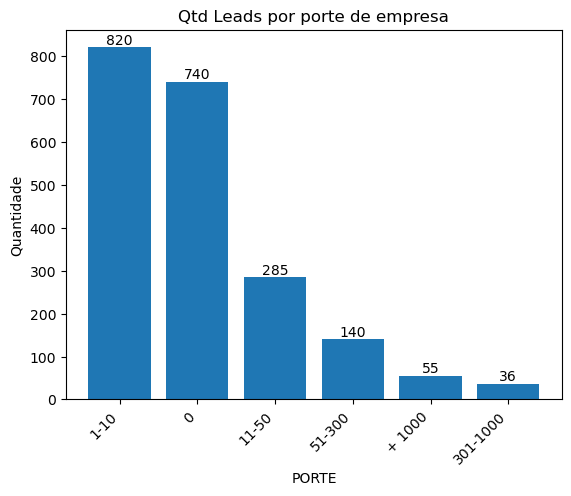

In [29]:
grafico_barra(df1, 'PORTE', 'Qtd Leads por porte de empresa')

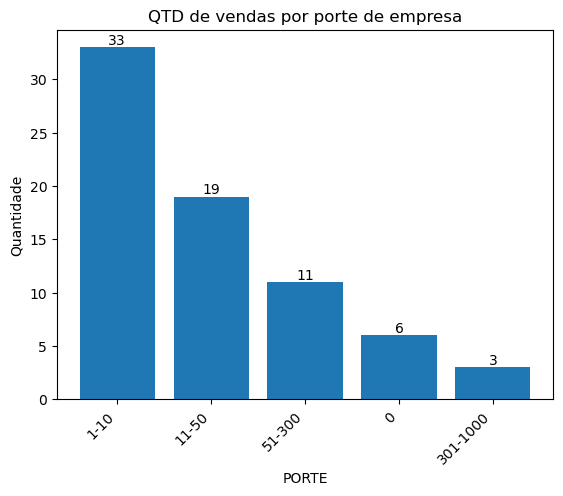

In [30]:
grafico_barra(df_vendido, 'PORTE', 'QTD de vendas por porte de empresa')

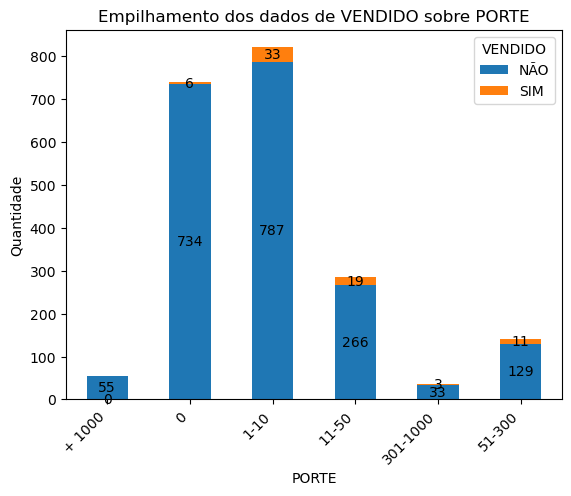

In [31]:
empilhar_dados(df1, 'VENDIDO', 'PORTE')

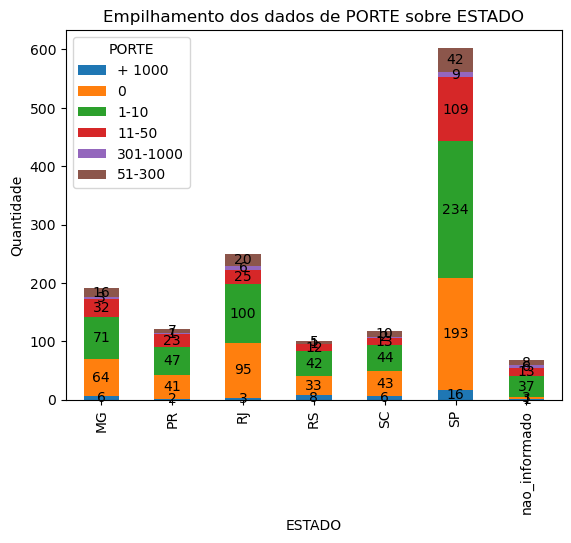

In [32]:
empilhar_dados_top7(df1, 'PORTE', 'ESTADO')

#### Insights
- Os principais clientes da nossa empresa são clientes de porte de 1-10 ou 0.
- São Paulo é o principal comprador e possui o maior número de clientes alvo (com porte de 0-10 e 0)

## 1.4 df_objetivo

In [33]:
df_objetivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LEAD_ID   2273 non-null   int64 
 1   OBJETIVO  2060 non-null   object
dtypes: int64(1), object(1)
memory usage: 35.6+ KB


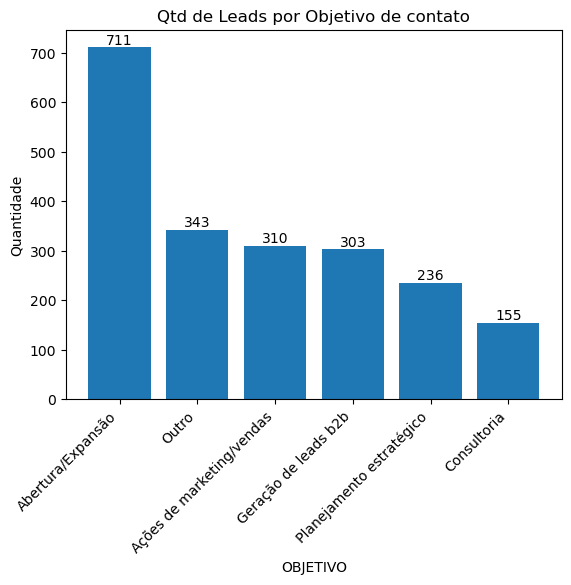

In [34]:
grafico_barra(df1, 'OBJETIVO', 'Qtd de Leads por Objetivo de contato')

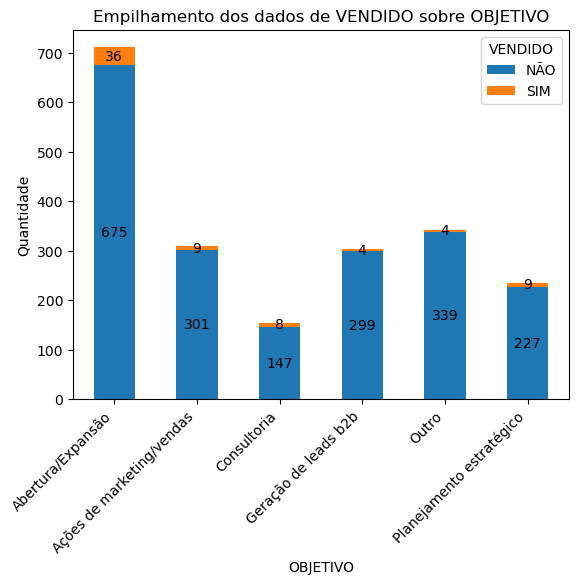

In [35]:
empilhar_dados(df1, 'VENDIDO', 'OBJETIVO')

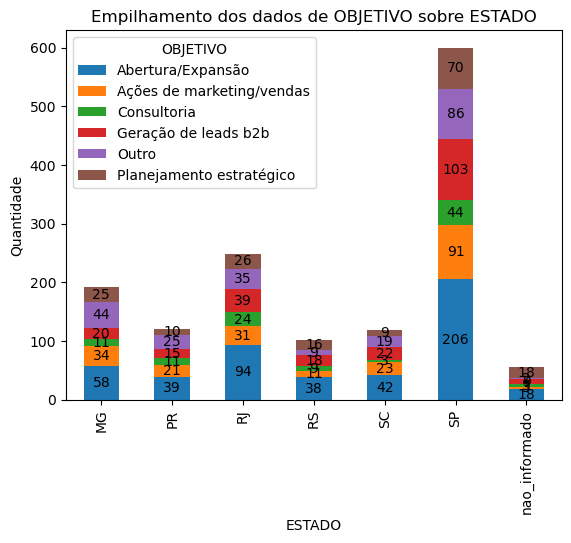

In [36]:
empilhar_dados_top7(df1, 'OBJETIVO', 'ESTADO')

#### Insights
- Podemos ver que o maior número de Leads e compradores estão na fase de "abertura e expanção".
- Seguindo no raciocínio, São Paulo possuí o maior número de clientes com esse objetivo, o que mostra um mercado promissor

# Análise de público mais rentável

- Com as análises acima, pudemos ver que a maior parte dos nosso cliente são da região sudeste, sobretudo em São Paulo e estão na fase de abertura e expansão
- Segundo o SEBRAE, uma empresa de até 50 funcionário é considerada de pequeno porte. E é justamente essa janela de porte que mais converte em nossa empresa.

In [41]:
# Filtrar o DataFrame para os estados SP, RJ e MG, e outras condições
df_perfeito = df1[(df1['ESTADO'].isin(['SP', 'RJ', 'MG', 'ES'])) & 
                  (df1['VENDIDO'] == 'NÃO')]
df_perfeito['PORTE'].value_counts()

PORTE
1-10        392
0           356
11-50       153
51-300       74
+ 1000       25
301-1000     16
Name: count, dtype: int64

In [42]:
df_perfeito

,LEAD_ID,ORIGEM,SUB-ORIGEM,MERCADO,LOCAL,PORTE,OBJETIVO,DATA CADASTRO,VENDIDO,month,year,ESTADO
1,11374979,Orgânico,NaN,Varejo,São Paulo - SP,11-50,NaN,2021-02-17 11:10:28,NÃO,2,2021,SP
15,11357814,Google,google - cpc,Varejo,Rio de Janeiro - RJ,0,Ações de marketing/vendas,2021-02-15 18:32:19,NÃO,2,2021,RJ
28,10566142,Google,google - cpc,NaN,Cariacica - ES,51-300,Abertura/Expansão,2020-12-01 05:46:39,NÃO,12,2020,ES
29,10572176,Google,google - cpc,NaN,Ribeirão Preto - SP,1-10,Planejamento estratégico,2020-12-01 12:26:28,NÃO,12,2020,SP
31,10621157,Google,google - cpc,NaN,Valinhos - SP,1-10,Ações de marketing/vendas,2020-12-05 09:53:30,NÃO,12,2020,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
2326,11708785,Google,google - cpc,Varejo,Itaperuna - RJ,1-10,Ações de marketing/vendas,2021-03-20 19:20:37,NÃO,3,2021,RJ
2327,11297983,Facebook,facebook - cpc,Varejo,Belo Horizonte - MG,0,Outro,2021-02-09 13:02:28,NÃO,2,2021,MG
2328,11331813,Facebook,facebook - cpc,Varejo,São Paulo - SP,11-50,Planejamento estratégico,2021-02-11 23:24:10,NÃO,2,2021,SP
2329,10846258,Facebook,facebook - cpc,Varejo,Belo Horizonte - MG,1-10,Abertura/Expansão,2020-12-30 19:26:54,NÃO,12,2020,MG


- Presumi que os clientes ideias seriam as empresas da região sudeste (SP, RJ, MG)

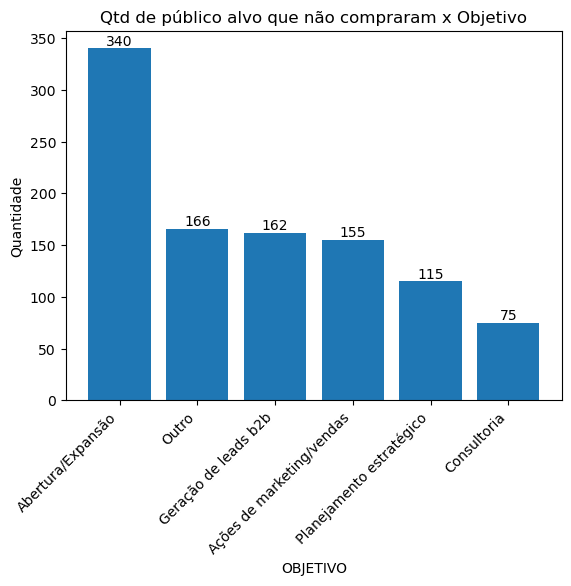

In [43]:
grafico_barra(df_perfeito, 'OBJETIVO', 'Qtd de público alvo que não compraram x Objetivo')
